In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn import tree

In [8]:

# Load the dataset
df = pd.read_csv('/workspaces/UnderWater-Decision/data/default_synthetic_dataset.csv')

# Encode categorical variables
le = LabelEncoder()
df['platform'] = le.fit_transform(df['platform'])
df['item'] = le.fit_transform(df['item'])
df['Recommended_Cleaning_Method'] = le.fit_transform(df['Recommended_Cleaning_Method'])

# Features and target variable
X = df[['platform', 'year', 'depthmin', 'depthmax', 'item', 'hardPerc', 'hardmm', 'softPerc', 'softmm', 'Total_Area_Coverage']]
y = df['Recommended_Cleaning_Method']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier
dt_classifier.fit(X_train, y_train)

# Make predictions
y_pred = dt_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report: \n{report}')


Accuracy: 0.9966666666666667
Classification Report: 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        46
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00       242
           3       1.00      1.00      1.00         6

    accuracy                           1.00       300
   macro avg       0.99      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



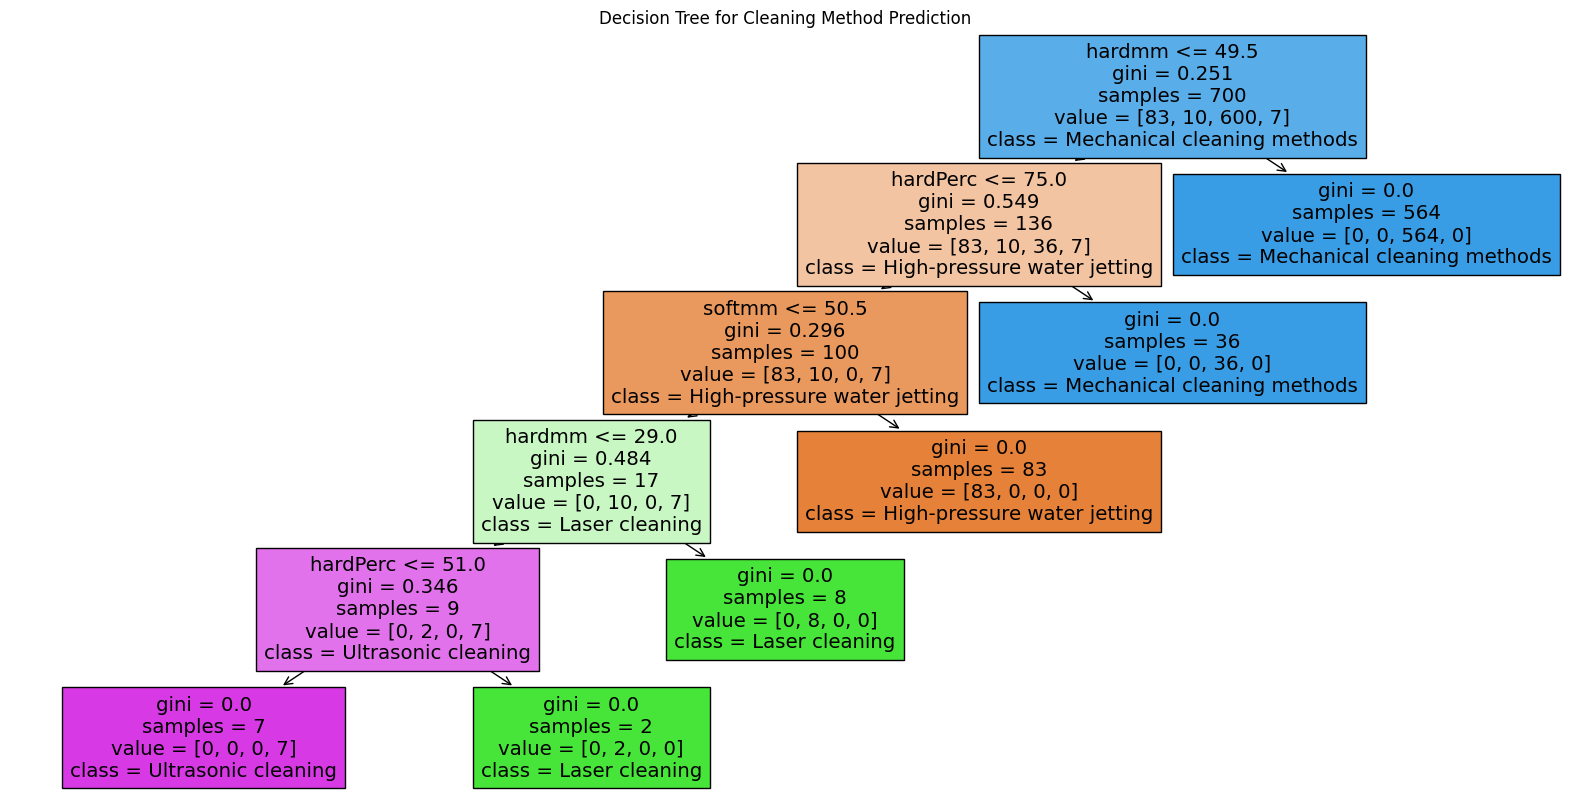

In [9]:
# Plot the decision tree
plt.figure(figsize=(20, 10))  # Set the size of the figure
tree.plot_tree(dt_classifier, feature_names=X_train.columns, class_names=le.classes_, filled=True)
plt.title("Decision Tree for Cleaning Method Prediction")
plt.show()

The above Decision Tree depicted is a graphical illustration of the algorithm used for predicting the appropriate cleaning method for underwater structures based on various input features. Here's a detailed academic explanation of the tree:

**Structure and Interpretation:**
The Decision Tree is structured as a series of binary decisions, starting from the root node at the top of the tree and branching out to subsequent decision nodes and leaf nodes. Each internal node (colored boxes with decision criteria) represents a "question" or "test" on an attribute (feature), and each branch represents the outcome of that test. The leaf nodes (boxes with a bold class label) represent the classification labels, which, in this context, are the recommended cleaning methods.

**Decision Nodes:**
Each decision node in the tree specifies a test on a single attribute with a corresponding Gini impurity measure, sample count, and class value counts. The Gini impurity is a metric that quantifies the purity of the node with respect to the target classes. A lower Gini impurity indicates a higher purity level, meaning that a particular node contains samples that are mostly from the same class. The 'samples' count indicates the number of observations in the dataset that reach the node, and the 'value' array provides the distribution of the class labels for these observations.

**Root Node:**
At the top of the tree, the root node tests the `hardPerc` attribute, which represents the percentage of hard fouling on the underwater structure. The decision criterion here is whether `hardPerc` is less than or equal to 75.0. This initial split partitions the data into two subsets: one where `hardPerc` is less than or equal to 75, leading to further branching, and one where `hardPerc` is greater, leading directly to a leaf node indicating the 'Mechanical cleaning methods' class.

**Branching Logic:**
As we traverse the tree, subsequent splits are made based on other attributes such as `softmm` and `hardmm`, which stand for the thickness of soft fouling and hard fouling in millimeters, respectively. These attributes are continuous and are tested at various threshold levels to further partition the data.

**Leaf Nodes:**
Upon reaching a leaf node, a final decision is made, indicating the recommended cleaning method. For instance, if we follow the leftmost path down the tree, we reach a leaf node with a Gini impurity of 0.0, meaning all samples at this node belong to the 'Ultrasonic cleaning' class, which suggests a unanimous decision for cleaning method in this particular leaf.

**Implications of the Tree's Structure:**
The decision tree's depth and the number of nodes it contains can provide insight into the complexity of the decision-making process and the relationships between features and the target variable. A deeper tree with many nodes may indicate a more complex decision boundary, while a shallower tree suggests a simpler model.

**Academic Context:**
In an academic context, such a decision tree would be analyzed to understand the impact of different fouling characteristics on the choice of cleaning method. Researchers might evaluate the tree's decisions against domain knowledge to verify its plausibility and seek explanations for any surprising splits. Further, the tree's performance would be rigorously evaluated using statistical measures and potentially compared to other machine learning models to assess its efficacy.

**Conclusion:**
In conclusion, the depicted Decision Tree provides an interpretable model for predicting cleaning methods based on fouling characteristics of underwater structures. Its structure reflects the non-linear relationships inherent in the data and offers a clear decision-making pathway from features to the predicted class.

In [10]:
importance = dt_classifier.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.27446
Feature: 6, Score: 0.60380
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.12174
Feature: 9, Score: 0.00000


In [11]:
from sklearn.tree import export_text
r = export_text(dt_classifier, feature_names=X_train.columns.tolist())
print(r)

|--- hardmm <= 49.50
|   |--- hardPerc <= 75.00
|   |   |--- softmm <= 50.50
|   |   |   |--- hardmm <= 29.00
|   |   |   |   |--- hardPerc <= 51.00
|   |   |   |   |   |--- class: 3
|   |   |   |   |--- hardPerc >  51.00
|   |   |   |   |   |--- class: 1
|   |   |   |--- hardmm >  29.00
|   |   |   |   |--- class: 1
|   |   |--- softmm >  50.50
|   |   |   |--- class: 0
|   |--- hardPerc >  75.00
|   |   |--- class: 2
|--- hardmm >  49.50
|   |--- class: 2



In [6]:
from sklearn.inspection import PartialDependenceDisplay

# Specify the target class index (e.g., 0 for the first class)
target_class = 0  # or another class index based on your model

# Generate the partial dependence display for the target class
PartialDependenceDisplay.from_estimator(
    dt_classifier, X_train, features, target=target_class
)

plt.show()

NameError: name 'features' is not defined

/opt/miniconda/envs/uw-decision/lib/python3.10/site-packages/sklearn/inspection/_plot/partial_dependence.py:972: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([min_val, max_val])


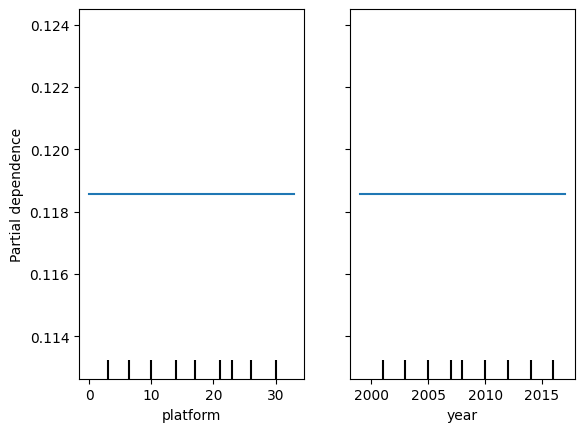

/opt/miniconda/envs/uw-decision/lib/python3.10/site-packages/sklearn/inspection/_plot/partial_dependence.py:972: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([min_val, max_val])


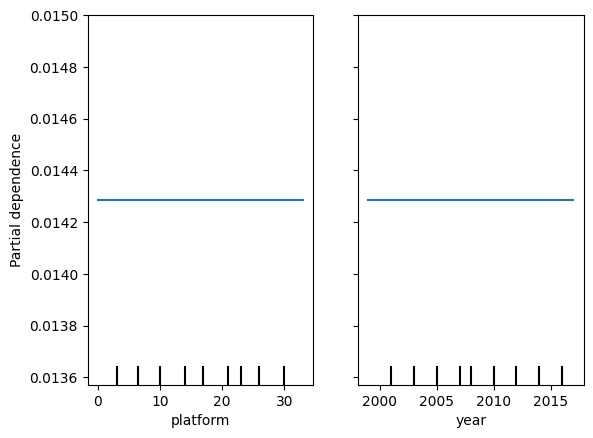

/opt/miniconda/envs/uw-decision/lib/python3.10/site-packages/sklearn/inspection/_plot/partial_dependence.py:972: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([min_val, max_val])


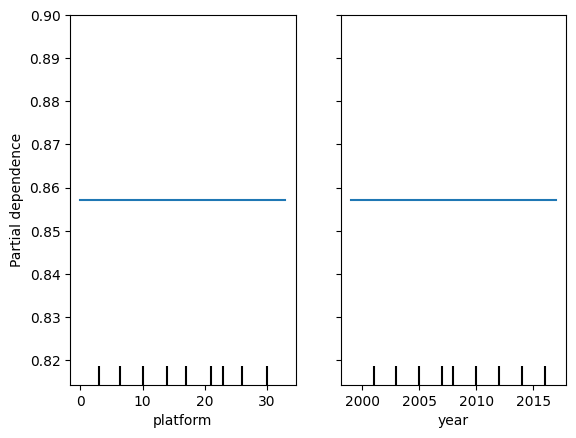

/opt/miniconda/envs/uw-decision/lib/python3.10/site-packages/sklearn/inspection/_plot/partial_dependence.py:972: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([min_val, max_val])


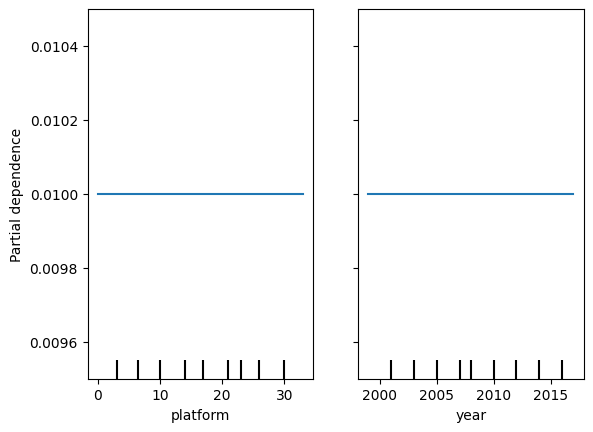

In [15]:
for target_class in range(len(dt_classifier.classes_)):
    PartialDependenceDisplay.from_estimator(
        dt_classifier, X_train, features, target=target_class
    )
    plt.show()


In [12]:
decision_path = dt_classifier.decision_path(X_test)
sample_id = 0  # Index of the sample you're interested in
feature_names = X_train.columns  # or X.columns if you have the full dataset
node_indicator = dt_classifier.decision_path(X_test)
leaf_id = dt_classifier.apply(X_test)

# Obtain ids of the nodes that the sample_id passed through
node_index = node_indicator.indices[node_indicator.indptr[sample_id]:
                                   node_indicator.indptr[sample_id + 1]]

print('Rules used to predict sample {id}:\n'.format(id=sample_id))
for node_id in node_index:
    # Check if value of the node is less than threshold (left child)
    if (X_test.iloc[sample_id, dt_classifier.tree_.feature[node_id]] <= dt_classifier.tree_.threshold[node_id]):
        threshold_sign = "<="
    else:
        threshold_sign = ">"

    print("decision node {node} : (X[{sample}, {feature}] = {value}) "
          "{sign} {threshold})".format(
              node=node_id,
              sample=sample_id,
              feature=feature_names[dt_classifier.tree_.feature[node_id]],
              value=X_test.iloc[sample_id, dt_classifier.tree_.feature[node_id]],
              sign=threshold_sign,
              threshold=dt_classifier.tree_.threshold[node_id]))


Rules used to predict sample 0:

decision node 0 : (X[0, hardmm] = 27) <= 49.5)
decision node 1 : (X[0, hardPerc] = 50) <= 75.0)
decision node 2 : (X[0, softmm] = 99) > 50.5)
decision node 8 : (X[0, softmm] = 99) > -2.0)


The output indicates the sequence of decisions or 'rules' that the trained Decision Tree model used to make a prediction for the first sample in the test dataset (sample with index 0). A breakdown of what each line tells us:

1. `decision node 0 : (X[0, hardmm] = 27) <= 49.5)`
   - The root node (node 0) of the decision tree checks whether the thickness of hard fouling (`hardmm`) for the first sample is less than or equal to 49.5 millimeters.
   - For this sample, the thickness is 27 millimeters, which satisfies this condition, so we move to the next node in the decision path that the sample takes (which is typically the left child of the node in a decision tree when the condition is true).

2. `decision node 1 : (X[0, hardPerc] = 50) <= 75.0)`
   - At decision node 1, the model checks if the percentage of hard fouling (`hardPerc`) is less than or equal to 75%.
   - The sample's `hardPerc` value is 50%, which also satisfies this condition, so we again follow the path to the next node based on this true condition.

3. `decision node 2 : (X[0, softmm] = 99) > 50.5)`
   - At decision node 2, the model checks if the thickness of soft fouling (`softmm`) is greater than 50.5 millimeters.
   - The `softmm` value for this sample is 99 millimeters, which means it does not satisfy the condition to go to the left child node (as it is greater than 50.5). Therefore, the sample takes the path to the right child node of this decision point.

4. `decision node 8 : (X[0, softmm] = 99) > -2.0)`
   - This line seems to be indicating a check at decision node 8 (which we reached from node 2 since the previous condition was true). However, the condition `> -2.0` is likely a default representation because all values of `softmm` will be greater than -2.0, as thickness can't be negative. This could be a terminal node (leaf) in the tree where a final prediction is made, or there might be additional context needed to interpret this condition.

Each of these decisions is based on the thresholds learned by the model during training to differentiate between the classes (in this case, the different cleaning methods). The final node reached by following these decisions will give the model's prediction for the appropriate cleaning method for this particular sample, based on its features.

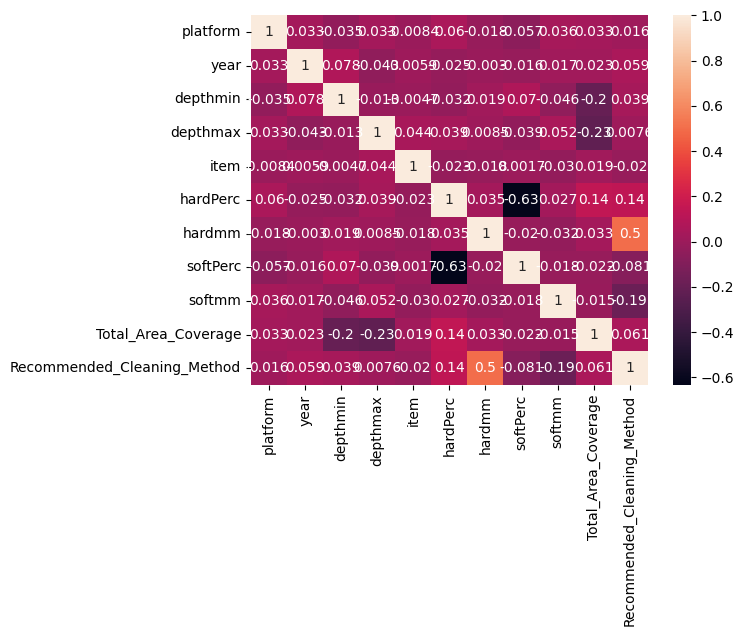

In [13]:
import seaborn as sns
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [21]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dt_classifier, X, y, cv=5)
scores

array([0.995, 0.99 , 1.   , 1.   , 1.   ])

The above output from the `cross_val_score` function is an array of scores obtained from a 5-fold cross-validation of your decision tree classifier (`dt_classifier`) on your dataset (`X` and `y`).

More specifically:

1. **Cross-Validation (CV)**: This technique is used to assess the generalizability of a machine learning model. The data is split into `k` subsets, or "folds". In this case, `cv=5` specifies that the data should be split into 5 folds.

2. **Training and Validation**: For each fold in the cross-validation:
   - The model is trained on `k-1` folds.
   - The remaining fold is used as a validation set to evaluate the model's performance.

3. **Scoring**: The `cross_val_score` function returns the score for each test fold. The default scoring metric for classification tasks is accuracy, which is the proportion of correctly predicted observations to the total observations in the fold.

4. **Result**: The array `[0.995, 0.99, 1.0, 1.0, 1.0]` represents the accuracy scores for each of the 5 folds. It means that in the first fold, the model correctly predicted 99.5% of the data, in the second fold 99%, and in the third, fourth, and fifth folds, it achieved perfect accuracy with a score of 100%.

This is a remarkable result and may be indicative of several scenarios:

- **High Model Performance**: Your decision tree model might be performing extremely well on the given dataset, capturing the underlying patterns accurately.

- **Simple Data Structure**: The problem at hand might be relatively simple for the decision tree to solve, which can sometimes happen if the decision boundaries between classes are clear-cut and well-defined.

- **Overfitting**: High scores, especially consistent perfect scores, can also be a sign of overfitting. This occurs when the model learns the training data too well, including noise and outliers, which can negatively impact its performance on unseen data.

- **Data Leakage**: Sometimes, exceptionally high scores can result from data leakage, where information from outside the training dataset is being used to make predictions. This can happen if there are features that inadvertently give away the target outcome.

To ensure these scores accurately reflect your model's ability to generalize, you should:

- Confirm there's no data leakage.
- Check the complexity of the model to ensure it's not overfitting (e.g., by limiting the depth of the tree).
- Evaluate the model on a completely separate test set that was not used during the cross-validation process.
- Consider using other metrics, such as precision, recall, F1-score, or confusion matrices, which can provide more insight into the model's performance across different classes.

In [22]:
import pickle

# Save the trained model to a file
with open('/workspaces/UnderWater-Decision/experiments/decision_tree_model.pkl', 'wb') as file:
    pickle.dump(dt_classifier, file)
print(type(loaded_model))
print(loaded_model)

<class 'sklearn.tree._classes.DecisionTreeClassifier'>
DecisionTreeClassifier(random_state=42)


In [23]:
import pandas as pd
import pickle
from sklearn.preprocessing import LabelEncoder

# Load the trained model from the file
with open('/workspaces/UnderWater-Decision/experiments/decision_tree_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Load new data
new_data_df = pd.read_csv('/workspaces/UnderWater-Decision/data/synthetic_dataset2.csv')

# Assuming new_data_df is your new data loaded and preprocessed

# Encode categorical variables
le_platform = LabelEncoder()
le_item = LabelEncoder()
le_method = LabelEncoder()

# Fit the label encoders to the original data (if available, else fit on new data)
# df should be replaced with the original dataframe used for training if available.
# If not, use new_data_df to fit the label encoders.
new_data_df['platform'] = le_platform.fit_transform(new_data_df['platform'])
new_data_df['item'] = le_item.fit_transform(new_data_df['item'])
new_data_df['Recommended_Cleaning_Method'] = le_method.fit_transform(new_data_df['Recommended_Cleaning_Method'])

# Select the features (this should match the features used during model training)
feature_names = ['platform', 'year', 'depthmin', 'depthmax', 'item', 'hardPerc', 'hardmm', 'softPerc', 'softmm', 'Total_Area_Coverage']
X_new = new_data_df[feature_names]

# Predict on the new data
new_predictions = loaded_model.predict(X_new)

# Decode the predicted labels to the original class names
decoded_predictions = le_method.inverse_transform(new_predictions)

# Output the decoded predictions
print(decoded_predictions)


['Mechanical cleaning methods' 'Mechanical cleaning methods'
 'Mechanical cleaning methods' 'Mechanical cleaning methods'
 'Mechanical cleaning methods' 'Mechanical cleaning methods'
 'Mechanical cleaning methods' 'Mechanical cleaning methods'
 'Mechanical cleaning methods' 'Mechanical cleaning methods'
 'Mechanical cleaning methods' 'Mechanical cleaning methods'
 'Mechanical cleaning methods' 'Mechanical cleaning methods'
 'Mechanical cleaning methods' 'Mechanical cleaning methods'
 'Mechanical cleaning methods' 'Mechanical cleaning methods'
 'High-pressure water jetting' 'Laser cleaning'
 'Mechanical cleaning methods' 'Mechanical cleaning methods'
 'Mechanical cleaning methods' 'Mechanical cleaning methods'
 'Mechanical cleaning methods' 'Mechanical cleaning methods'
 'Mechanical cleaning methods' 'Mechanical cleaning methods'
 'Mechanical cleaning methods' 'Mechanical cleaning methods'
 'Mechanical cleaning methods' 'Mechanical cleaning methods'
 'Mechanical cleaning methods' 'Mecha

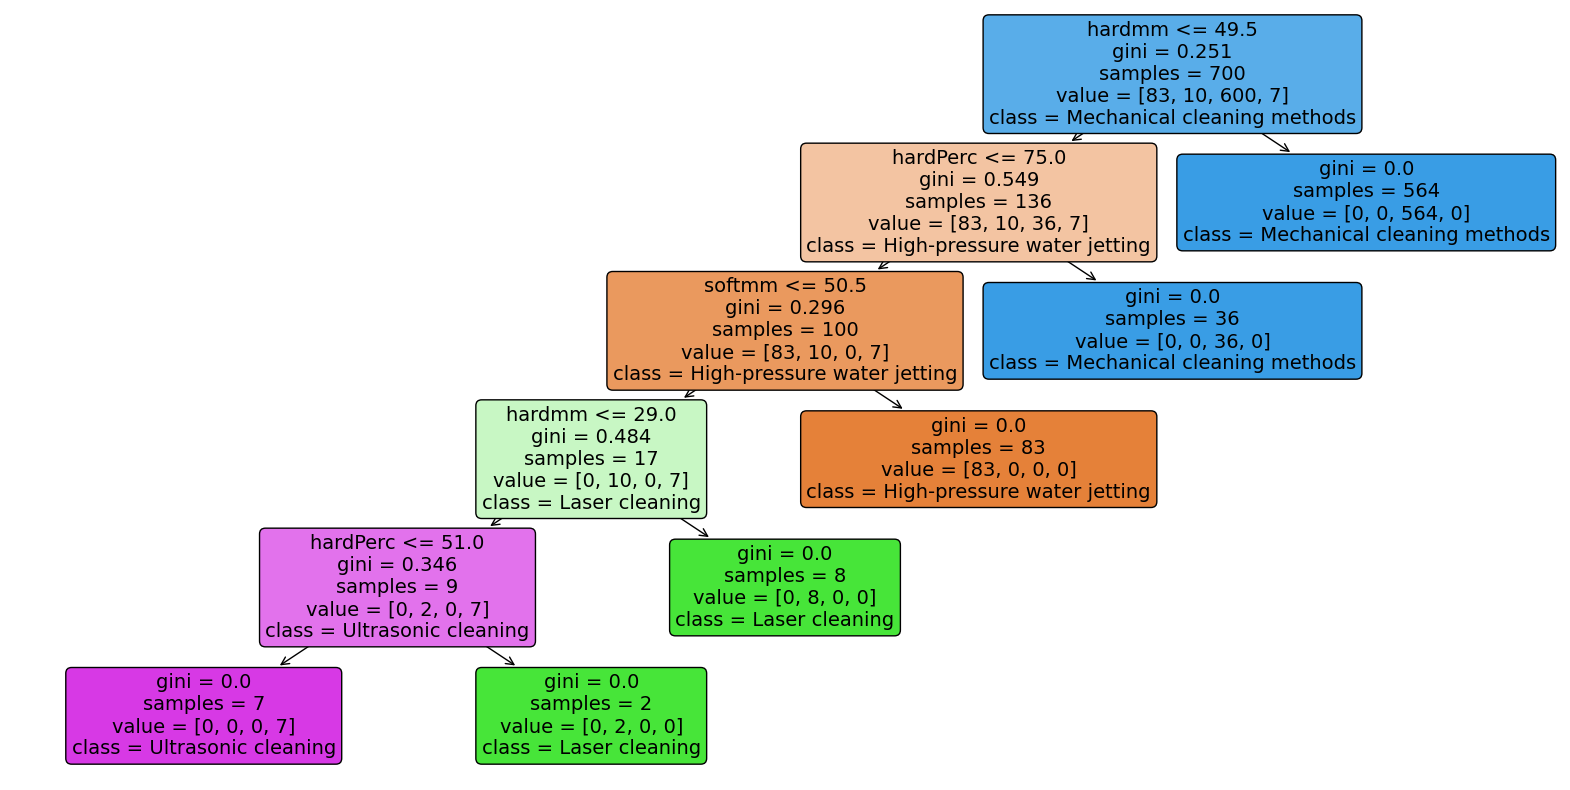

In [19]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Assuming 'loaded_model' is your trained DecisionTreeClassifier model
plt.figure(figsize=(20,10))  # Set the figure size (width, height) in inches
plot_tree(loaded_model, 
          feature_names=feature_names,  # The names of the features
          class_names=le_method.classes_,  # The names of the classes
          filled=True, 
          rounded=True, 
          fontsize=14)
plt.show()


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

# Load your dataset
# df = pd.read_csv('path_to_your_dataset.csv')

# Preprocessing: assuming the last column is the target and the rest are features
X = df.drop('target_column_name', axis=1)  # Replace with actual target column name
y = df['target_column_name']                # Replace with actual target column name

# Convert categorical variables to numerical if necessary
# For example, using pd.get_dummies() for one-hot encoding or sklearn's LabelEncoder

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Random Forest model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_classifier.fit(X_train, y_train)

# Make predictions
predictions = rf_classifier.predict(X_test)

# predictions will contain the predicted labels for your test set


KeyError: "['target_column_name'] not found in axis"